In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder




import warnings
warnings.filterwarnings("ignore")   # Ignore all warnings

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/vehicles.csv')
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.shape

(426880, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05,0.0,420331.000000,420331.000000
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04,NaN,38.493940,-94.748599
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05,NaN,5.841533,18.365462
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04,NaN,34.601900,-111.939847
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04,NaN,39.150100,-88.432600
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05,NaN,42.398900,-80.832039
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [ ]:
remove_features = ['id','url','region','region_url','model','image_url','description','posting_date','county','VIN','lat','long']
df = df.drop(remove_features, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   condition     252776 non-null  object 
 4   cylinders     249202 non-null  object 
 5   fuel          423867 non-null  object 
 6   odometer      422480 non-null  float64
 7   title_status  418638 non-null  object 
 8   transmission  424324 non-null  object 
 9   drive         296313 non-null  object 
 10  size          120519 non-null  object 
 11  type          334022 non-null  object 
 12  paint_color   296677 non-null  object 
 13  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 45.6+ MB


In [ ]:
# dealing with missing values

df.isnull().sum()

price                0
year              1205
manufacturer     17646
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [ ]:
df.head(30)

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


The first 28 rows have  price but no imformation on most of the independent features so we are removing it from dataset

In [ ]:
# code to remove first 28 rows

df = df.iloc[27:]

In [ ]:
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,2014.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,22590,2010.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,39590,2020.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,30990,2017.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,15000,2013.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


### Working on Price (target) columns

In [ ]:
# checking for negative values

negative_price_count = df[df['price'] < 0].shape[0]
if negative_price_count > 0:
  print(f"There are {negative_price_count} negative values in the price column.")
else:
  print("There are no negative values in the price column.")


There are no negative values in the price column.


In [ ]:
# removing the records where price is zero

df = df[df['price'] >= 100]


<Axes: xlabel='price'>

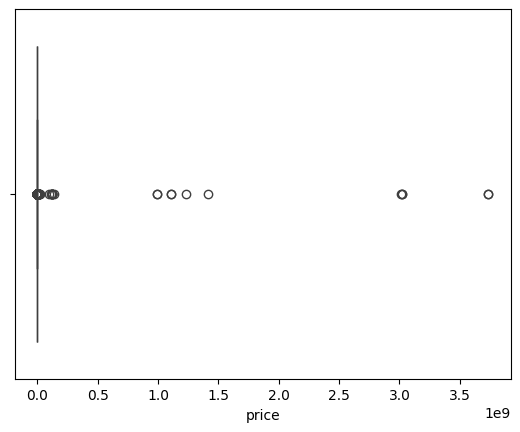

In [ ]:
# finding the outlier in price column

sns.boxplot(x=df['price'])


+ There are outlier in extreme highs that can affect the evaluation metrics of predictive model.

In [ ]:
# calculate the outlier using interquartiile range for columns'

def find_outliers(df, column_name):
    """
    Find outliers in a DataFrame column using the interquartile range (IQR) method.

    Args:
        df (DataFrame): The DataFrame containing the column.
        column_name (str): The name of the column to find outliers in.

    Returns:
        outliers (DataFrame): DataFrame containing the outliers.
    """
    # Calculate the interquartile range (IQR)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find the outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Print the number of outliers
    print(f"Number of outliers in {column_name}: {len(outliers)}")
    print(f"The lower bound in {column_name}: {lower_bound}")
    print(f"The upper bound in {column_name}: {upper_bound}")

    return outliers


In [ ]:
outliers_df = find_outliers(df, 'price')
print(outliers_df)

Number of outliers in price: 7741
The lower bound in price: -23112.5
The upper bound in price: 58507.5
            price    year manufacturer condition    cylinders    fuel  \
204         58977  2019.0          gmc       NaN          NaN     gas   
280     987654321  1960.0    chevrolet       NaN          NaN     gas   
346         98900  2001.0      ferrari      good  8 cylinders     gas   
365         72900  2021.0    chevrolet      good  8 cylinders     gas   
461         99950  2021.0    chevrolet       NaN          NaN     gas   
...           ...     ...          ...       ...          ...     ...   
426694      59900  2014.0         ford       NaN          NaN  diesel   
426716      65950  2020.0         ford  like new  8 cylinders  diesel   
426778      65995  2020.0          gmc      good  8 cylinders     gas   
426810      58995  2017.0          gmc       NaN  8 cylinders  diesel   
426840      65999  2017.0          NaN       NaN          NaN  diesel   

        odometer tit

In [ ]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['price'].quantile(0.05)
percentile_95 = df['price'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  2300.0
The 95th percentile :  45000.0


The 95th percentile value is too low. That means majority of data lies from USD 1000 to  USD 50,000. But we have some of the car values in millions.

In [ ]:
# prompt: find the records pwhere price > 58,508

outliers_price = df[df['price'] > 58508]
print(outliers_price)


            price    year manufacturer condition    cylinders    fuel  \
204         58977  2019.0          gmc       NaN          NaN     gas   
280     987654321  1960.0    chevrolet       NaN          NaN     gas   
346         98900  2001.0      ferrari      good  8 cylinders     gas   
365         72900  2021.0    chevrolet      good  8 cylinders     gas   
461         99950  2021.0    chevrolet       NaN          NaN     gas   
...           ...     ...          ...       ...          ...     ...   
426694      59900  2014.0         ford       NaN          NaN  diesel   
426716      65950  2020.0         ford  like new  8 cylinders  diesel   
426778      65995  2020.0          gmc      good  8 cylinders     gas   
426810      58995  2017.0          gmc       NaN  8 cylinders  diesel   
426840      65999  2017.0          NaN       NaN          NaN  diesel   

        odometer title_status transmission drive       size         type  \
204      66368.0        clean    automatic   4w

from the data itself we can see this is false information poised on Craigslist website from where the data was scraped.

In [ ]:
# prompt: remove the record where  the price > 58508

df = df[df['price'] < 58508]


In [ ]:
df.shape

(382895, 14)

<Axes: xlabel='price'>

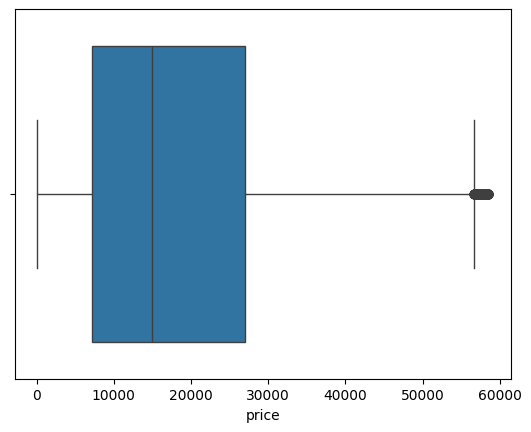

In [ ]:
sns.boxplot(x=df['price'])

In [ ]:
# applying log transformation on price

# import numpy as np
# # Apply log transformation on price
# df['price'] = np.log(df['price'])

# # # Inverse transformation
# # def inverse_log_transform(log_price):
# #   return np.exp(log_price)


In [ ]:
# sns.boxplot(x=df['price'])

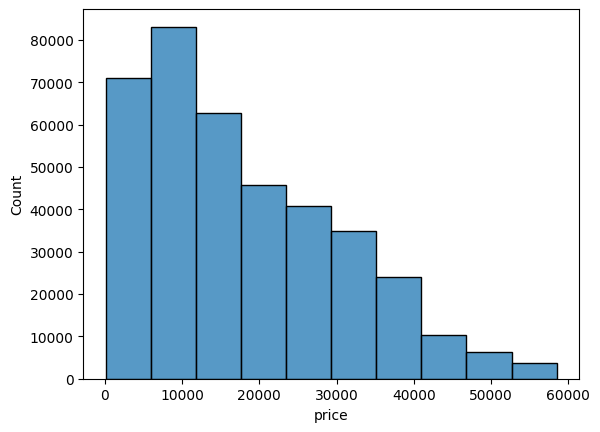

In [ ]:
# histogram of price column

import matplotlib.pyplot as plt
sns.histplot(df['price'], bins=10)
plt.show()


In [ ]:
# prompt: make the price  gaussian distribution

# import matplotlib.pyplot as plt
# # Import necessary libraries
# import numpy as np

# # Apply Box-Cox transformation to normalize the price data
# df['price'], lambda_value = stats.boxcox(df['price'])

# # Check the distribution of the transformed price data
# sns.histplot(df['price'], bins=10)
# plt.show()


### Analysis on numerical columns

In [ ]:
# prompt: find all the columns  that is not object type

numerical_cols = df.select_dtypes(exclude='object').columns
print(numerical_cols)


Index(['price', 'year', 'odometer'], dtype='object')


#### Analysis on year

In [ ]:
# substract the year column by year 2023 and rewrite the year column in df

df['year'] = 2023 - df['year']
df.head()

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
27,33590,9.0,gmc,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white,al
28,22590,13.0,chevrolet,good,8 cylinders,gas,71229.0,clean,other,NaN,NaN,pickup,blue,al
29,39590,3.0,chevrolet,good,8 cylinders,gas,19160.0,clean,other,NaN,NaN,pickup,red,al
30,30990,6.0,toyota,good,8 cylinders,gas,41124.0,clean,other,NaN,NaN,pickup,red,al
31,15000,10.0,ford,excellent,6 cylinders,gas,128000.0,clean,automatic,rwd,full-size,truck,black,al


In [ ]:
outliers_df = find_outliers(df, 'year')
print(outliers_df)

Number of outliers in year: 14915
The lower bound in year: -7.5
The upper bound in year: 28.5
        price   year   manufacturer  condition    cylinders fuel  odometer  \
37       4500   31.0           jeep  excellent  6 cylinders  gas  192000.0   
101     12990   55.0          volvo        NaN          NaN  gas   99999.0   
137      2500   57.0            NaN       good  6 cylinders  gas   47000.0   
208      2500   47.0      chevrolet        NaN          NaN  gas     100.0   
210      1300   54.0  mercedes-benz        NaN          NaN  gas   12774.0   
...       ...    ...            ...        ...          ...  ...       ...   
426729  20000   72.0           jeep   like new  4 cylinders  gas   14409.0   
426762   7000   41.0          mazda  excellent        other  gas   80000.0   
426809  18000   33.0           jeep       good  8 cylinders  gas  114400.0   
426831   9800   38.0         nissan   like new  6 cylinders  gas  115000.0   
426838  21900  103.0            NaN       good  

<Axes: xlabel='year'>

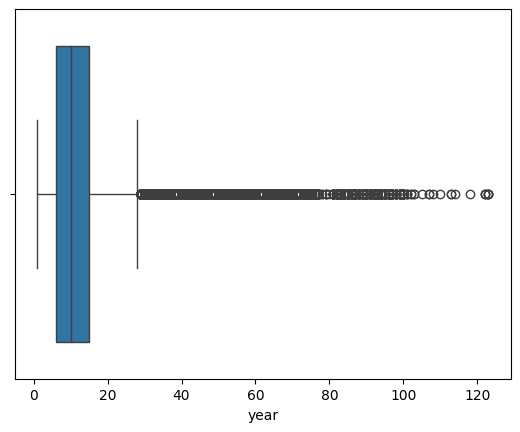

In [ ]:
sns.boxplot(x=df['year'])

In [ ]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['year'].quantile(0.05)
percentile_95 = df['year'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  4.0
The 95th percentile :  25.0


+ the 95th percentile starts from 24 years and IQR outlier range starts from 30 years. So we need to find the closed percentile so we can use Winsorization to replace the extreme highs.

In [ ]:
# remove the record where  the year > 30 years

df = df[df['year'] <= 30]

#### Analysis on odometer

In [ ]:
# remove records for odometer less than 100 from df

df = df[df['odometer'] > 100]


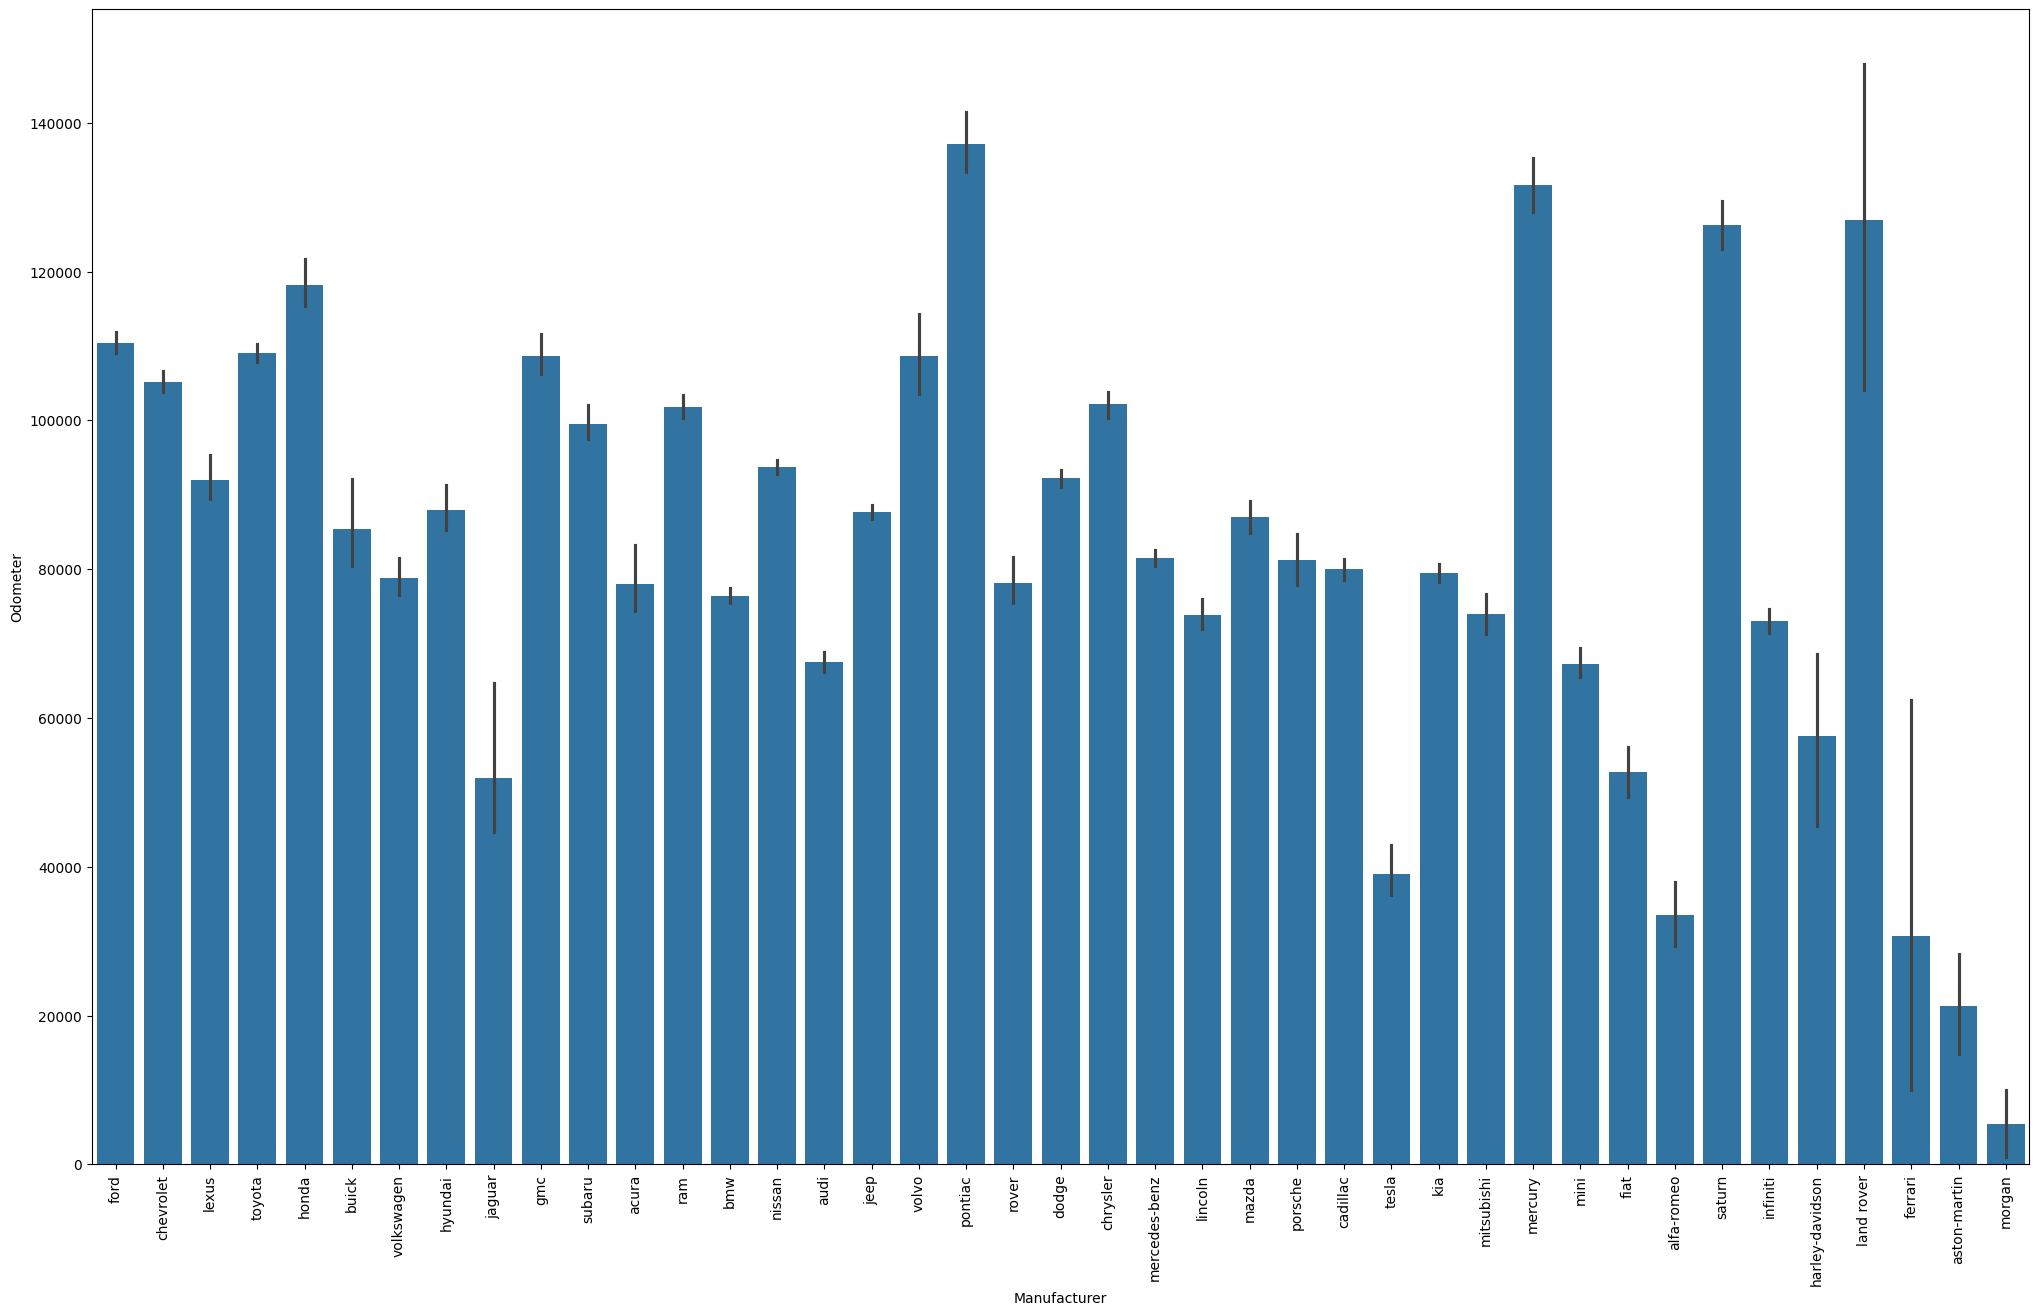

In [ ]:
df=df.sort_values(by=['odometer'],ascending=False)
plt.figure(figsize=(25,15))
sns.barplot(x=df.manufacturer, y=df.odometer)
plt.xticks(rotation= 90)
plt.xlabel('Manufacturer')
plt.ylabel('Odometer')
plt.show()

<Axes: xlabel='odometer'>

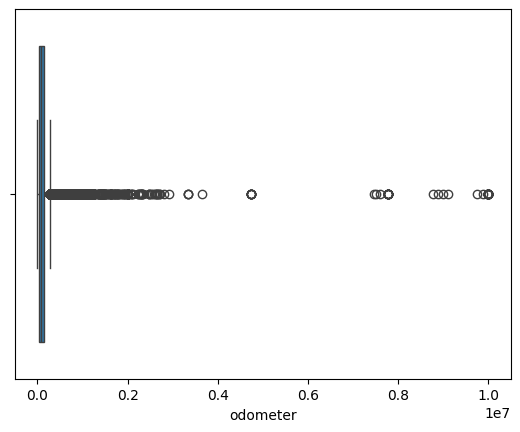

In [ ]:
# find presence of outlier in odometer column in df

sns.boxplot(x=df['odometer'])


In [ ]:
outliers_df = find_outliers(df, 'odometer')
print(outliers_df)

Number of outliers in odometer: 3139
The lower bound in odometer: -104132.5
The upper bound in odometer: 283279.5
        price  year manufacturer  condition    cylinders    fuel    odometer  \
109793    450  23.0         ford        NaN          NaN     gas  10000000.0   
106192    500  13.0    chevrolet        NaN          NaN     gas  10000000.0   
109840    450  23.0         ford        NaN          NaN     gas  10000000.0   
108102    450  23.0         ford        NaN          NaN     gas  10000000.0   
144436   4500  13.0         ford       good  4 cylinders     gas  10000000.0   
...       ...   ...          ...        ...          ...     ...         ...   
125825   7500  21.0        lexus       good  8 cylinders     gas    283400.0   
59268    8000  30.0        lexus  excellent  6 cylinders     gas    283400.0   
484     11500  15.0         ford       good  8 cylinders  diesel    283356.0   
211743  11500  20.0          ram       good  6 cylinders  diesel    283324.0   
372942

In [ ]:
# checking for values in 5th percentile and 95th percentile
percentile_5 = df['odometer'].quantile(0.05)
percentile_95 = df['odometer'].quantile(0.95)

print("The 5th percentile : ", percentile_5)
print("The 95th percentile : ", percentile_95)

The 5th percentile :  10157.0
The 95th percentile :  206111.0


Findings:

+ There is no outliers on extreme low.
+ The 95th percentile starts from 206000 km but outlier through IQR starts from aprrox. 284000 km. So we will match the percentile and outlier and then apply Winsorization only to the upper extreme values.  Winsorization is a method that replaces extreme values with less extreme values.

In [ ]:
# remove the record where  the odometer > 284000 years

df = df[df['odometer'] <= 284000]


In [ ]:
df.describe()

,price,year,odometer
count,359441.000000,359441.000000,359441.000000
mean,18146.540256,10.659953,93881.098959
std,12729.266441,5.585235,60540.167466
min,100.000000,1.000000,101.000000
25%,7500.000000,6.000000,40903.000000
50%,15499.000000,10.000000,90000.000000
75%,26995.000000,14.000000,136664.000000
max,58500.000000,30.000000,284000.000000


<Axes: xlabel='odometer'>

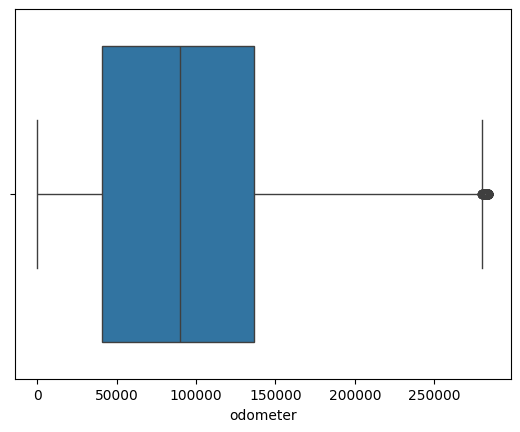

In [ ]:

sns.boxplot(x=df['odometer'])

In [ ]:
# find missing values in odometer

missing_odometer = df['odometer'].isnull().sum()
print(f"Number of missing values in odometer: {missing_odometer}")


Number of missing values in odometer: 0


### Analysis on Categorical Columns

#### Analysis on cylinders column

In [ ]:
# Replace 'cylinders ' from string values in the 'cylinders' column
df['cylinders'] = df['cylinders'].apply(lambda x: x.replace(' cylinders', '') if isinstance(x, str) else x)

In [ ]:
# find unique values of cylinders column

df['cylinders'].unique()


array(['4', '6', nan, '8', '10', '5', 'other', '3', '12'], dtype=object)

In [ ]:
# change 'others' in cylinders column to nan

df['cylinders'] = df['cylinders'].replace('other', np.nan)


In [ ]:
df['cylinders'].unique()

array(['4', '6', nan, '8', '10', '5', '3', '12'], dtype=object)

In [ ]:
# code to replace object type into int type in cylinders column without touching missing values

df['cylinders'] = df['cylinders'].apply(pd.to_numeric, errors='ignore')


In [ ]:
df['cylinders'].unique()

array([ 4.,  6., nan,  8., 10.,  5.,  3., 12.])

#### Analysis on manufacturer

In [ ]:
# prompt: find the unique values in manufacturer column and its frequency

manufacturer_counts = df['manufacturer'].value_counts()
print(manufacturer_counts)


ford               58254
chevrolet          44232
toyota             30054
honda              19215
nissan             16836
jeep               16205
ram                15010
gmc                13816
bmw                13267
dodge              11302
mercedes-benz       9297
hyundai             9138
subaru              8772
volkswagen          8088
lexus               7537
kia                 7333
audi                6824
cadillac            5976
acura               5580
chrysler            5376
mazda               4835
buick               4794
infiniti            4398
lincoln             3779
volvo               2972
mitsubishi          2899
mini                2214
rover               1786
pontiac             1781
jaguar              1723
porsche             1058
saturn              1054
mercury              955
alfa-romeo           802
tesla                754
fiat                 729
harley-davidson      130
aston-martin          11
land rover            10
ferrari                4


In [ ]:
# removing the record if manufacturer_counts <1000 from df

df = df[df['manufacturer'].isin(manufacturer_counts[manufacturer_counts > 1000].index)]


In [ ]:
# categorical columns

categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
print(categorical_cols)


['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [ ]:
# prompt: find the unique values of all the columns in list categorical_cols

for col in categorical_cols:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")


Unique values for column 'manufacturer': ['toyota' 'chrysler' 'ford' 'chevrolet' 'volkswagen' 'ram' 'gmc'
 'cadillac' 'lexus' 'honda' 'bmw' 'pontiac' 'buick' 'dodge' 'nissan'
 'subaru' 'jeep' 'hyundai' 'acura' 'mitsubishi' 'mazda' 'volvo' 'saturn'
 'mercedes-benz' 'mini' 'rover' 'lincoln' 'audi' 'infiniti' 'jaguar'
 'porsche' 'kia']
Unique values for column 'condition': ['excellent' 'good' nan 'fair' 'like new' 'salvage' 'new']
Unique values for column 'fuel': ['gas' 'diesel' 'hybrid' 'other' nan 'electric']
Unique values for column 'title_status': ['clean' 'salvage' 'rebuilt' 'missing' nan 'parts only' 'lien']
Unique values for column 'transmission': ['automatic' 'manual' 'other' nan]
Unique values for column 'drive': ['rwd' 'fwd' nan '4wd']
Unique values for column 'size': ['mid-size' nan 'full-size' 'compact' 'sub-compact']
Unique values for column 'type': ['SUV' 'mini-van' nan 'truck' 'pickup' 'sedan' 'other' 'van' 'coupe'
 'convertible' 'hatchback' 'wagon' 'offroad' 'bus']
Unique 

converting others into nan and later on imputting those values

In [ ]:
# change 'other' in fuel column to nan

df['fuel'] = df['fuel'].replace('other', np.nan)

In [ ]:
# change 'missing' in title_staus column to nan

df['title_status'] = df['title_status'].replace('missing', np.nan)

In [ ]:
# change 'other' in transmission column to nan

df['transmission'] = df['transmission'].replace('other', np.nan)

In [ ]:
# change 'other' in type column to nan

df['type'] = df['type'].replace('other', np.nan)

In [ ]:
for col in categorical_cols:
  unique_values = df[col].unique()
  print(f"Unique values for column '{col}': {unique_values}")

Unique values for column 'manufacturer': ['toyota' 'chrysler' 'ford' 'chevrolet' 'volkswagen' 'ram' 'gmc'
 'cadillac' 'lexus' 'honda' 'bmw' 'pontiac' 'buick' 'dodge' 'nissan'
 'subaru' 'jeep' 'hyundai' 'acura' 'mitsubishi' 'mazda' 'volvo' 'saturn'
 'mercedes-benz' 'mini' 'rover' 'lincoln' 'audi' 'infiniti' 'jaguar'
 'porsche' 'kia']
Unique values for column 'condition': ['excellent' 'good' nan 'fair' 'like new' 'salvage' 'new']
Unique values for column 'fuel': ['gas' 'diesel' 'hybrid' nan 'electric']
Unique values for column 'title_status': ['clean' 'salvage' 'rebuilt' nan 'parts only' 'lien']
Unique values for column 'transmission': ['automatic' 'manual' nan]
Unique values for column 'drive': ['rwd' 'fwd' nan '4wd']
Unique values for column 'size': ['mid-size' nan 'full-size' 'compact' 'sub-compact']
Unique values for column 'type': ['SUV' 'mini-van' nan 'truck' 'pickup' 'sedan' 'van' 'coupe' 'convertible'
 'hatchback' 'wagon' 'offroad' 'bus']
Unique values for column 'paint_color': [

### handling the missing values using KNNimputer techniques

In [ ]:
# Separate features and target variable
X = df.drop(columns=['price'])
y = df['price']

In [ ]:
X.shape

(345405, 13)

In [ ]:
X.isnull().sum()

year                 0
manufacturer         0
condition       132100
cylinders       139731
fuel             27151
odometer             0
title_status      6612
transmission     57921
drive           103488
size            249868
type             87856
paint_color      99905
state                0
dtype: int64

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345405 entries, 28757 to 94438
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  object 
 2   condition     213305 non-null  object 
 3   cylinders     205674 non-null  float64
 4   fuel          318254 non-null  object 
 5   odometer      345405 non-null  float64
 6   title_status  338793 non-null  object 
 7   transmission  287484 non-null  object 
 8   drive         241917 non-null  object 
 9   size          95537 non-null   object 
 10  type          257549 non-null  object 
 11  paint_color   245500 non-null  object 
 12  state         345405 non-null  object 
dtypes: float64(3), object(10)
memory usage: 36.9+ MB


In [ ]:
y.shape

(345405,)

### Handling Categorical features into numerical features

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
imputer = KNN()


def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in categorical_cols:
    encode(X[columns])

In [ ]:
X.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
28757,24.0,29.0,0.0,4.0,2.0,284000.0,0.0,0.0,2.0,2.0,0.0,9.0,4.0
345069,21.0,6.0,2.0,6.0,2.0,284000.0,0.0,0.0,1.0,NaN,5.0,1.0,40.0
333970,21.0,8.0,NaN,NaN,0.0,284000.0,0.0,0.0,NaN,1.0,0.0,10.0,38.0
140650,10.0,8.0,2.0,NaN,2.0,284000.0,0.0,0.0,NaN,NaN,NaN,NaN,14.0
419821,10.0,8.0,NaN,NaN,2.0,284000.0,0.0,0.0,NaN,NaN,NaN,NaN,48.0


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345405 entries, 28757 to 94438
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  object 
 2   condition     213305 non-null  object 
 3   cylinders     205674 non-null  float64
 4   fuel          318254 non-null  object 
 5   odometer      345405 non-null  float64
 6   title_status  338793 non-null  object 
 7   transmission  287484 non-null  object 
 8   drive         241917 non-null  object 
 9   size          95537 non-null   object 
 10  type          257549 non-null  object 
 11  paint_color   245500 non-null  object 
 12  state         345405 non-null  object 
dtypes: float64(3), object(10)
memory usage: 36.9+ MB


### Handling missing values using KNN Imputation technique

In [ ]:
impute_cols = ['condition','cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color']

In [ ]:
# function that does knn imputation on features one by one

def knn_imputation(data, features, k):
  """
  Imputes missing values in features using KNN imputation.

  Args:
    data: Pandas DataFrame containing the data.
    features: List of features to impute.
    k: Number of neighbors to use for imputation.

  Returns:
    Pandas DataFrame with imputed features.
  """

  imputed_data = data.copy()
  for feature in features:
    # Create KNN imputer
    imputer = KNNImputer(n_neighbors=k)

    # Impute missing values
    imputed_data[feature] = imputer.fit_transform(data[[feature]])[:, 0]

  return imputed_data

# Impute missing values in categorical features using KNN with k=5
imputed_data = knn_imputation(X.copy(), impute_cols, k=3)

# Print the imputed data
print(imputed_data.head())



        year manufacturer  condition  cylinders  fuel  odometer  title_status  \
28757   24.0         29.0   0.000000   4.000000   2.0  284000.0           0.0   
345069  21.0          6.0   2.000000   6.000000   2.0  284000.0           0.0   
333970  21.0          8.0   1.291587   5.891416   0.0  284000.0           0.0   
140650  10.0          8.0   2.000000   5.891416   2.0  284000.0           0.0   
419821  10.0          8.0   1.291587   5.891416   2.0  284000.0           0.0   

        transmission     drive      size      type  paint_color state  
28757            0.0  2.000000  2.000000  0.000000     9.000000   4.0  
345069           0.0  1.000000  1.194993  5.000000     1.000000  40.0  
333970           0.0  0.726873  1.000000  0.000000    10.000000  38.0  
140650           0.0  0.726873  1.194993  5.385383     5.612094  14.0  
419821           0.0  0.726873  1.194993  5.385383     5.612094  48.0  


In [ ]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345405 entries, 28757 to 94438
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  object 
 2   condition     345405 non-null  float64
 3   cylinders     345405 non-null  float64
 4   fuel          345405 non-null  float64
 5   odometer      345405 non-null  float64
 6   title_status  345405 non-null  float64
 7   transmission  345405 non-null  float64
 8   drive         345405 non-null  float64
 9   size          345405 non-null  float64
 10  type          345405 non-null  float64
 11  paint_color   345405 non-null  float64
 12  state         345405 non-null  object 
dtypes: float64(11), object(2)
memory usage: 36.9+ MB


In [ ]:
imputed_data.head()

,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
28757,24.0,29.0,0.000000,4.000000,2.0,284000.0,0.0,0.0,2.000000,2.000000,0.000000,9.000000,4.0
345069,21.0,6.0,2.000000,6.000000,2.0,284000.0,0.0,0.0,1.000000,1.194993,5.000000,1.000000,40.0
333970,21.0,8.0,1.291587,5.891416,0.0,284000.0,0.0,0.0,0.726873,1.000000,0.000000,10.000000,38.0
140650,10.0,8.0,2.000000,5.891416,2.0,284000.0,0.0,0.0,0.726873,1.194993,5.385383,5.612094,14.0
419821,10.0,8.0,1.291587,5.891416,2.0,284000.0,0.0,0.0,0.726873,1.194993,5.385383,5.612094,48.0


In [ ]:
# prompt: convert manufacturer and state column data type to float64

imputed_data['manufacturer'] = imputed_data['manufacturer'].astype(float)
imputed_data['state'] = imputed_data['state'].astype(float)


In [ ]:
imputed_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345405 entries, 28757 to 94438
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  float64
 2   condition     345405 non-null  float64
 3   cylinders     345405 non-null  float64
 4   fuel          345405 non-null  float64
 5   odometer      345405 non-null  float64
 6   title_status  345405 non-null  float64
 7   transmission  345405 non-null  float64
 8   drive         345405 non-null  float64
 9   size          345405 non-null  float64
 10  type          345405 non-null  float64
 11  paint_color   345405 non-null  float64
 12  state         345405 non-null  float64
dtypes: float64(13)
memory usage: 36.9 MB


In [ ]:
# prompt: combine imputed_data and y and save the new dataframe as final.csv where index=false


final_df = pd.concat([imputed_data, y], axis=1)
final_df.to_csv('final.csv', index=False)


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 345405 entries, 28757 to 94438
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          345405 non-null  float64
 1   manufacturer  345405 non-null  float64
 2   condition     345405 non-null  float64
 3   cylinders     345405 non-null  float64
 4   fuel          345405 non-null  float64
 5   odometer      345405 non-null  float64
 6   title_status  345405 non-null  float64
 7   transmission  345405 non-null  float64
 8   drive         345405 non-null  float64
 9   size          345405 non-null  float64
 10  type          345405 non-null  float64
 11  paint_color   345405 non-null  float64
 12  state         345405 non-null  float64
 13  price         345405 non-null  int64  
dtypes: float64(13), int64(1)
memory usage: 39.5 MB
